<div style="text-align: center; background: url(lulth.png); background-repeat: no-repeat; background-size: 20%; background-position: bottom right;">
    <h1 style="border-radius: 15px; padding: 5px; background: #915f2d; color: #ffffff;">COMPUTE - AI for image and video data</h1>
    <h3>Marcus Klang</h3>
    <h3 style="margin:0;padding:5"><a href="mailto:Marcus.Klang@cs.lth.se">Marcus.Klang@cs.lth.se</a></h3>
    <h3>Oct 19 - Afternoon</h3>
    <h5>Putting it all together - Training models</h5>
    <br/>
    <h2>Welcome!</h2>
</div>

<h1 style="margin-bottom: 15px">The agenda</h1>

<div style="border-radius: 15px; padding: 0px; background: #EDE4DC;">
    <h3 style="background: #915f2d; color: #FFFFFF; border-radius: 15px; padding: 8px; margin: 0">Putting it all together</h3>
    <div style="padding: 5px">
    <ul style="margin:0">
        <li><b>Concepts</b>
            <ul>
                <li>Gradient decent</li>
                <li>Optimization</li>
                <li>Auto diffrentiation</li>
                <li>Learning rate</li>
                <li>Underfitting/Overfitting</li>
                <li>Confusion matrix</li>
            </ul>
        </li>
        <li>Keras Model API - Loading/Saving models</li>
        <li><b>Live coding:</b>
            <ul>
                <li>MNIST</li>
                <li>Citrus Leaves classification</li>
                <li>Transfer learning - Citrus Leaves</li>
                <li>Transfer learning with augmentation - Citrus Leaves</li>
            </ul>
        </li>
     </ul>
    </div>
</div>

<div style="text-align:center; width:100%">
    <h1>Training</h1>
</div>

# Overall goal

 * Find parameters by iteratively talking steps that improve a models ability to better do predictions
    + Gradient Decent
 * Stochastic Gradient Decent
    + We will not train on the entire data at once, and as such we will only have an estimate of what the best direction will be $\rightarrow$ stochastic
    + We will feed the model with mini-batches, that is a set of *samples* to learn from.
       - Learning is the mathematical equivalent to finding a gradient or derivative with respect to the error

# Gradient Decent

### Find a local minima with respect to the loss function
<img src="slide_images/Gradient_descent.gif" style="width:40%"/>

**Image source:** Wikimedia Commons   
https://commons.wikimedia.org/wiki/File:Gradient_descent.gif

# Derivative - Gradient

We call it a **derivative** when we have one dimension   
We call it a **gradient** when we have multiple dimensions

<img src="slide_images/derivative.svg" style="width:45%"/>

# Derivative - Gradient

**The definition of a derivative**

$$
f'(a)=\lim_{h\to 0}\frac{f(a+h)-f(a)}{h}
$$

**Example**

$$
\begin{align*}
\textrm{normal function : } & f(x) &= x^2 \\
\textrm{it's derivative : } & f'(x) &= 2x 
\end{align*}
$$

# Todays imports

In [2]:
import tensorflow as tf
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, utils, losses, optimizers, Model, Sequential
from sklearn.metrics import classification_report, confusion_matrix

# Auto diffrentiation

How to get the gradient:
 * Analythical
    + Time consuming - difficult
 * Approximately by using small differences
    + Inprecise, instable
    + Costly
 * Using a auto diffrentiation algorithm
    + Records the operations required to compute the value
    + Algorithmically computes the deriviate using the chain rule
    + Works with arbitrary code in most cases
    
For deeper introduction: https://www.tensorflow.org/guide/autodiff

## Auto diffrentiation

### Numerical approximation

In [3]:
def f(x):
    return x**2

In [9]:
h = 1e-10
(f(3.0+h) - f(3.0)) / h

6.000000496442226

Central difference - slightly better

In [10]:
h = 1e-7
(f(3.0+h) - f(3.0-h)) / (h+h)

5.999999990180527

Exact with tensorflow

In [11]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = f(x)
    
tape.gradient(y, x).numpy()

6.0

# Auto diffrentiation

Over many values

In [12]:
x = tf.Variable(np.linspace(-3,3, 100))

with tf.GradientTape() as tape:
    y = x**2
    
tape.gradient(y, x)

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([-6.        , -5.87878788, -5.75757576, -5.63636364, -5.51515152,
       -5.39393939, -5.27272727, -5.15151515, -5.03030303, -4.90909091,
       -4.78787879, -4.66666667, -4.54545455, -4.42424242, -4.3030303 ,
       -4.18181818, -4.06060606, -3.93939394, -3.81818182, -3.6969697 ,
       -3.57575758, -3.45454545, -3.33333333, -3.21212121, -3.09090909,
       -2.96969697, -2.84848485, -2.72727273, -2.60606061, -2.48484848,
       -2.36363636, -2.24242424, -2.12121212, -2.        , -1.87878788,
       -1.75757576, -1.63636364, -1.51515152, -1.39393939, -1.27272727,
       -1.15151515, -1.03030303, -0.90909091, -0.78787879, -0.66666667,
       -0.54545455, -0.42424242, -0.3030303 , -0.18181818, -0.06060606,
        0.06060606,  0.18181818,  0.3030303 ,  0.42424242,  0.54545455,
        0.66666667,  0.78787879,  0.90909091,  1.03030303,  1.15151515,
        1.27272727,  1.39393939,  1.51515152,  1.63636364,  1.75757576,
        1.878787

# Minimal optimization problem with tensorflow
#### Some data

In [13]:
# Generate some data
x = np.linspace(-5,5,100)
y = x*0.4 + np.random.randn(x.shape[0])*0.5 + 6

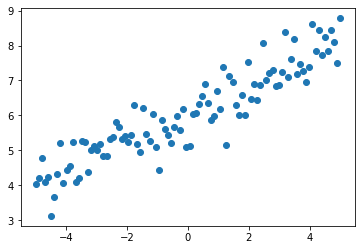

In [14]:
plt.scatter(x,y)

# Minimal optimization problem with tensorflow

Our model:
$$
\begin{align}
 y = k x + b
\end{align}
$$

Our goal is to find parameters k and b

In [15]:
# Mean squared error
mse = tf.keras.losses.MSE

In [28]:
# learning rate
lr = 1e-2
k = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

print("initial values", f"k = {k.numpy()}", f"b = {b.numpy()}")

for i in range(200):
    with tf.GradientTape() as tape:
        # Predict
        yp = k * x + b
        
        # Compute loss
        loss = mse(y, yp) 
        
    print("iter", i, "loss", loss.numpy())
        
    # Compute the gradient for loss with respect to k and b
    grad = tape.gradient(loss, [k, b])
    d_k, d_b = grad
    
    # Update our parameters
    k.assign_add(-d_k * lr)  
    b.assign_add(-d_b * lr)

initial values k = -1.0756173133850098 b = 0.03223961591720581
iter 0 loss 55.13919
iter 1 loss 47.92287
iter 2 loss 42.5614
iter 3 loss 38.493103
iter 4 loss 35.33046
iter 5 loss 32.805927
iter 6 loss 30.734657
iter 7 loss 28.988775
iter 8 loss 27.47966
iter 9 loss 26.14579
iter 10 loss 24.944284
iter 11 loss 23.845154
iter 12 loss 22.827293
iter 13 loss 21.875738
iter 14 loss 20.979778
iter 15 loss 20.131634
iter 16 loss 19.325573
iter 17 loss 18.557287
iter 18 loss 17.823458
iter 19 loss 17.121468
iter 20 loss 16.449188
iter 21 loss 15.804849
iter 22 loss 15.186934
iter 23 loss 14.594112
iter 24 loss 14.025202
iter 25 loss 13.479113
iter 26 loss 12.954856
iter 27 loss 12.451499
iter 28 loss 11.968171
iter 29 loss 11.50405
iter 30 loss 11.058355
iter 31 loss 10.630343
iter 32 loss 10.2193
iter 33 loss 9.824551
iter 34 loss 9.445442
iter 35 loss 9.081354
iter 36 loss 8.7316885
iter 37 loss 8.395873
iter 38 loss 8.073359
iter 39 loss 7.763617
iter 40 loss 7.4661427
iter 41 loss 7.18044

In [17]:
print(f"k = {k.numpy()}, b = {b.numpy()}")

k = 0.4023090898990631, b = 5.944342136383057


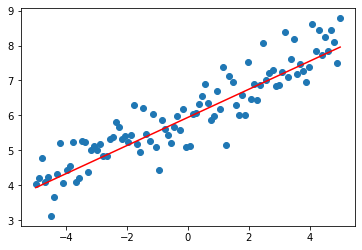

In [18]:
plt.scatter(x,y)
#xp = np.linspace(-6,6,100)
yp = x * k.numpy() + b.numpy()
plt.plot(x, yp, 'r')

# Minimal optimization problem with tensorflow
### Keras

In [23]:
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(1))
model.compile(loss=losses.MSE, optimizer=optimizers.SGD(1e-2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x, y, batch_size=16, epochs=25)

Epoch 1/25
7/7 [==============================] - 0s 612us/step - loss: 38.9858
Epoch 2/25
7/7 [==============================] - 0s 613us/step - loss: 25.5017
Epoch 3/25
7/7 [==============================] - 0s 658us/step - loss: 19.0410
Epoch 4/25
7/7 [==============================] - 0s 732us/step - loss: 14.4269
Epoch 5/25
7/7 [==============================] - 0s 637us/step - loss: 10.9756
Epoch 6/25
7/7 [==============================] - 0s 603us/step - loss: 8.3985
Epoch 7/25
7/7 [==============================] - 0s 590us/step - loss: 6.4366
Epoch 8/25
7/7 [==============================] - 0s 738us/step - loss: 4.9469
Epoch 9/25
7/7 [==============================] - 0s 743us/step - loss: 3.6375
Epoch 10/25
7/7 [==============================] - 0s 847us/step - loss: 2.8306
Epoch 11/25
7/7 [==============================] - 0s 821us/step - loss: 2.2256
Epoch 12/25
7/7 [==============================] - 0s 725us/step - loss: 1.7145
Epoch 13/25
7/7 [===========================

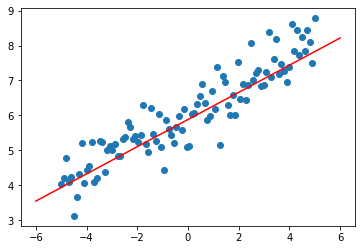

In [25]:
plt.scatter(x,y)
xp = np.linspace(-6,6,100)
yp = model.predict(xp.reshape(-1,1))
plt.plot(xp, yp, 'r')

In [26]:
model.get_weights()

[array([[0.38914183]], dtype=float32), array([5.881606], dtype=float32)]

# Learning rate

Equivalent to our step size, it should be just right.

* Too small - convergance is slow
* Just right - converge quickly and produce good models
* Too big - will not converge at all


https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.43424&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# Optimizers

Using a fixed step size is very simplified
We can end up in situations were the gradient can get stuck at a local minima.

The job of an optimizer is to be more intilligent about how the gradient is applied

https://www.fatalerrors.org/a/tensorflow-summary-and-comparison-of-various-optimizers.html

# Keras - Sequential vs Functional API

 * **Sequential** - The network is always one sequence of transformations, no splits or merges
    + May be used as a building block in the Functional API
    + Method of use: Add layers
 * **Functional** - The network may be constists of multiple inputs and outputs
    + Method of use: Create layer, use the layer as a function

# Keras - Sequential API

In [29]:
# Sequential API - one line

model_seq = Sequential()
model_seq.add(layers.Input(shape=(28,28,1))) # Not strictly necessary
model_seq.add(layers.Conv2D(2, kernel_size=(3,3)))
model_seq.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_seq.add(layers.Flatten()) # Flattening the 2D arrays for fully connected layers
model_seq.add(layers.Dense(128, activation="relu"))
model_seq.add(layers.Dropout(0.2))
model_seq.add(layers.Dense(10,activation="softmax"))

# Keras - Sequential API

In [30]:
model_seq.compile(loss="categorical_crossentropy", optimizer="adam")
model_seq.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 2)         20        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 2)         0         
_________________________________________________________________
flatten (Flatten)            (None, 338)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               43392     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 44,702
Trainable params: 44,702
Non-trainable params: 0
__________________________________________________

# Keras - Sequential API

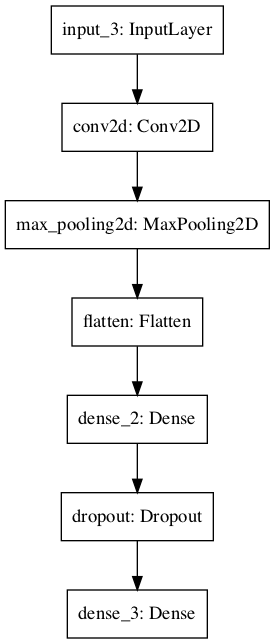

In [31]:
utils.plot_model(model_seq)

# Keras - Functional API

In [ ]:
#tf.keras.backend.clear_session()

In [34]:
# Functional API - graph, free to choose

x_in = layers.Input(shape=(28,28,1),name="image")
x = layers.Conv2D(2, kernel_size=(3,3))(x_in)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
y = layers.Dense(10,activation="softmax", name="label")(x)

model_fn = Model(inputs=[x_in], outputs=[y])

In [35]:
model_fn.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
model_fn.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 2)         20        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 2)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 338)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               43392     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
label (Dense)                (None, 10)                1290

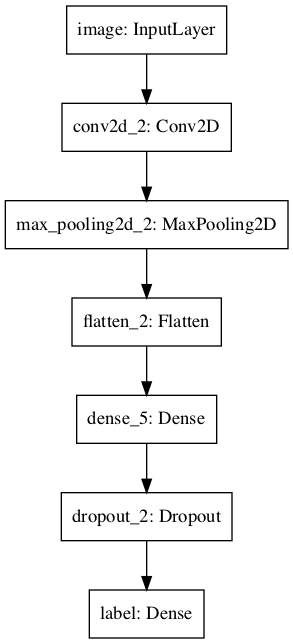

In [36]:
utils.plot_model(model_fn)

# Train a model on MNIST

### Prepare data

In [37]:
import tensorflow_datasets as tfds

In [38]:
# MNIST Model
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], shuffle_files=False)

In [40]:
def convert(data):
     return data["image"], data["label"]

In [41]:
X,y = next(ds_train.map(convert).take(1).as_numpy_iterator())

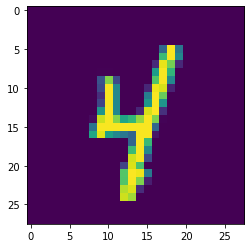

In [42]:
plt.imshow(X)

In [43]:
y

4

In [44]:
train = ds_train.map(convert, num_parallel_calls=tf.data.AUTOTUNE)\
                .cache()\
                .shuffle(60000)\
                .batch(32)

In [45]:
history = model_fn.fit(train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.8098
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4395
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3073
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2410
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1955
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1708
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1531
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1347
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1278
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1206


In [46]:
#model_fn = tf.keras.models.load_model("mnist.h5")

In [47]:
y_pred = model_fn.predict(ds_test.map(convert).batch(128))

In [49]:
y_pred[0]

array([1.1706150e-13, 2.3036508e-09, 9.9999082e-01, 8.6170512e-06,
       2.2107145e-12, 1.2883548e-09, 1.0442019e-12, 5.1704382e-07,
       8.5776619e-10, 2.0069478e-16], dtype=float32)

In [ ]:
#model_fn.save("mnist.h5")

In [54]:
y_pred[0:2]

array([[1.1706150e-13, 2.3036508e-09, 9.9999082e-01, 8.6170512e-06,
        2.2107145e-12, 1.2883548e-09, 1.0442019e-12, 5.1704382e-07,
        8.5776619e-10, 2.0069478e-16],
       [1.0000000e+00, 1.1932905e-25, 1.1726976e-09, 2.3614883e-13,
        9.7302666e-16, 4.9971596e-11, 1.9692337e-08, 2.5014948e-09,
        7.2194049e-11, 5.7059073e-09]], dtype=float32)

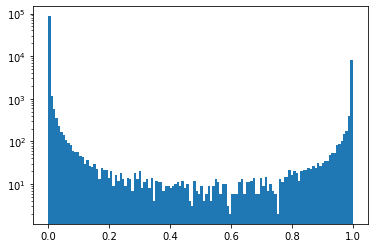

In [51]:
plt.hist(y_pred.flatten(), bins=128, log=True)
plt.show()

In [55]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [56]:
y_true = np.array([sample["label"] for sample in ds_test.as_numpy_iterator()])

In [57]:
print(classification_report(y_true, y_pred_classes.flatten()))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.96      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.95      0.96       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [58]:
pd.DataFrame(confusion_matrix(y_true, y_pred_classes), columns = list(range(10)))

,0,1,2,3,4,5,6,7,8,9
0,969,0,0,0,0,1,4,2,4,0
1,0,1124,3,0,0,1,2,1,4,0
2,4,1,1011,2,2,1,2,5,4,0
3,1,0,5,974,0,11,0,7,9,3
4,1,0,2,0,965,0,4,0,2,8
5,4,0,0,13,2,847,11,4,6,5
6,4,2,0,0,3,4,942,0,3,0
7,0,1,9,1,6,0,0,1004,2,5
8,9,0,3,5,6,0,2,6,940,3
9,2,2,0,4,22,1,0,11,5,962


<AxesSubplot:>

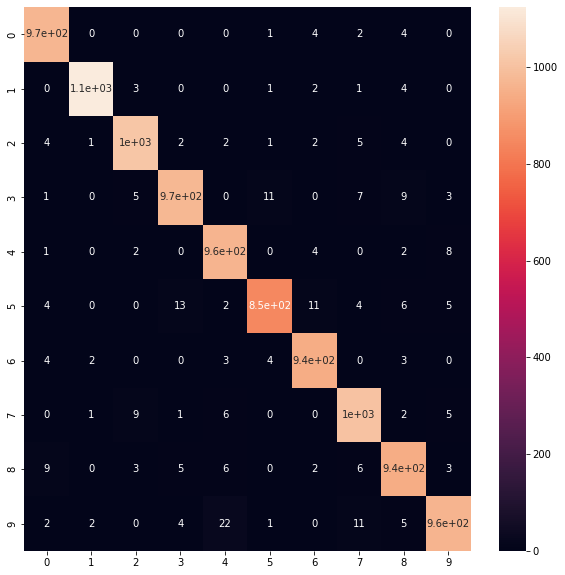

In [59]:
df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred_classes), 
                     index = list(range(10)),
                     columns = list(range(10)))

plt.figure(figsize = (10,10))

sn.heatmap(df_cm, annot=True)

<h1 style="margin-bottom: 15px">Summary</h1>

<div style="border-radius: 15px; padding: 0px; background: #EDE4DC;">
    <h3 style="background: #915f2d; color: #FFFFFF; border-radius: 15px; padding: 8px; margin: 0">Putting it all together</h3>
    <div style="padding: 5px">
    <ul style="margin:0">
        <li><b>Concepts</b>
            <ul>
                <li>Gradient decent</li>
                <li>Optimization</li>
                <li>Auto diffrentiation</li>
                <li>Learning rate</li>
                <li>Underfitting/Overfitting</li>
                <li>Confusion matrix</li>
            </ul>
        </li>
        <li>Keras Model API - Loading/Saving models</li>
        <li><b>Live coding:</b>
            <ul>
                <li>MNIST</li>
                <li>Citrus Leaves classification</li>
                <li>Transfer learning - Citrus Leaves</li>
                <li>Transfer learning with augmentation - Citrus Leaves</li>
            </ul>
        </li>
     </ul>
    </div>
</div>